
### To start with, I will analyze the UFO sightings data in the US.


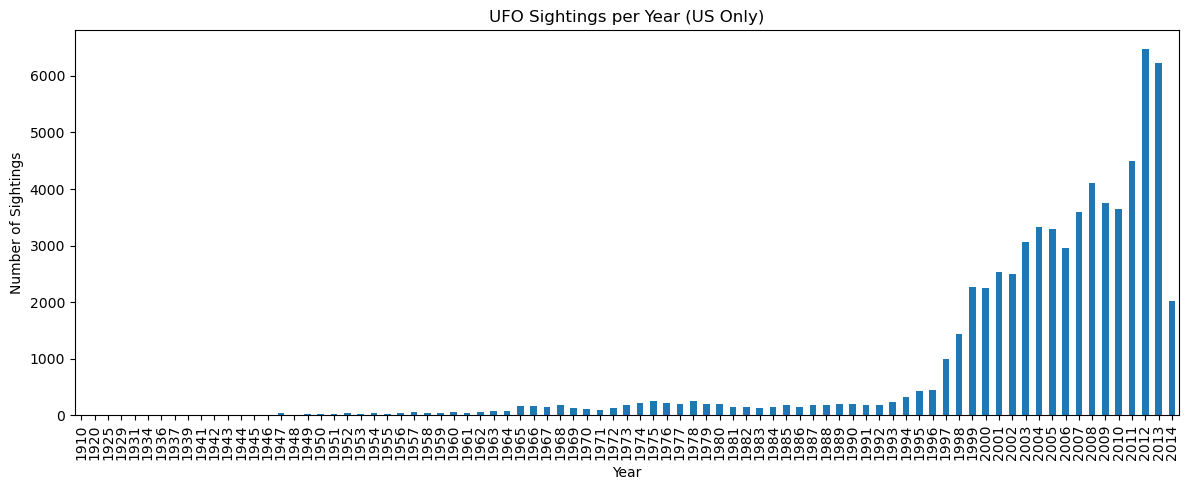


### 1.Visual Support:
- Bar plot shows 2012 and 2013 has the highest amounts of sighting in data.
- The year 2013 is the second **highest number of sightings**.
- Therefore, I will focus on the year 2013 for further analysis. But before that here's sightings state by state to see if there are any highlighted states.:


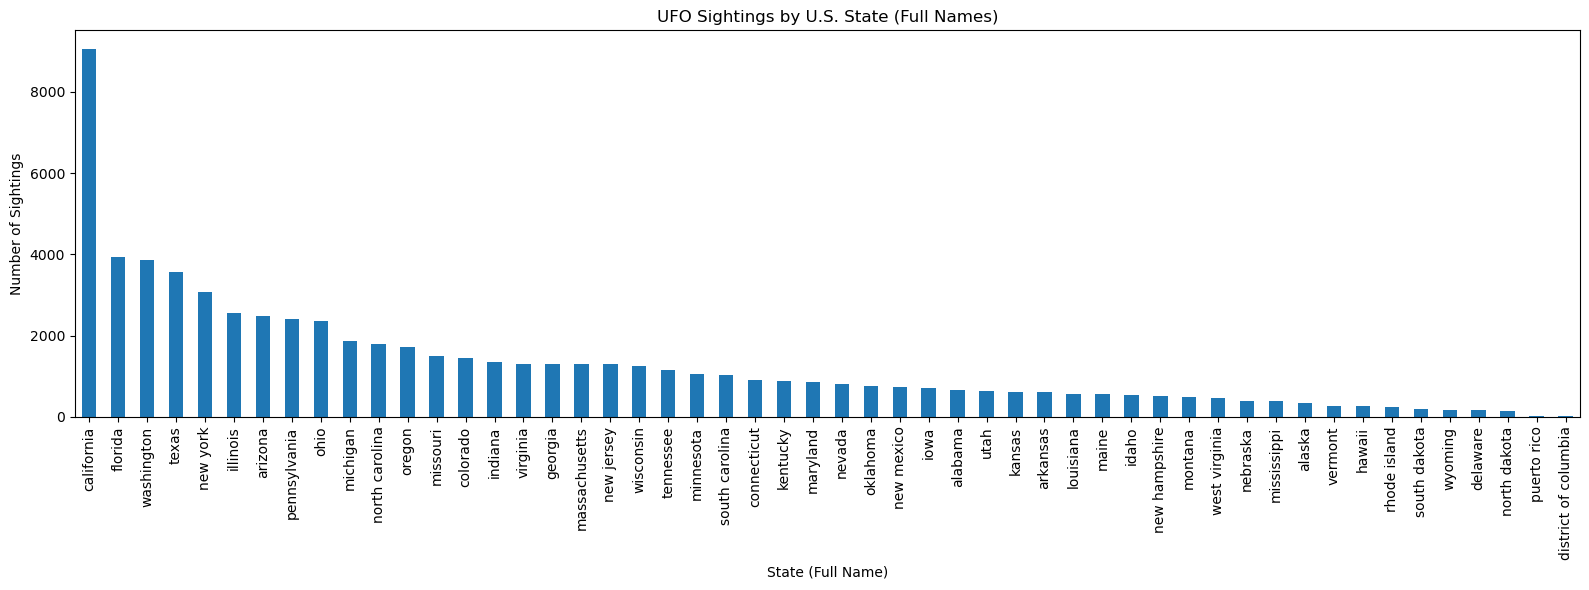


### 2.Visual Support:
- Bar plot shows **sightings by state**.
- **California** has the **highest number of sightings**. 
### What's next?
- I will analyze the relationship between **UFO sightings** and **alcohol consumption** in the US.
- I will use the **2013 alcohol consumption data** to see if there my to test my second hypothesis that **alcohol consumption** is related to **UFO sightings**.


(6035, 20)


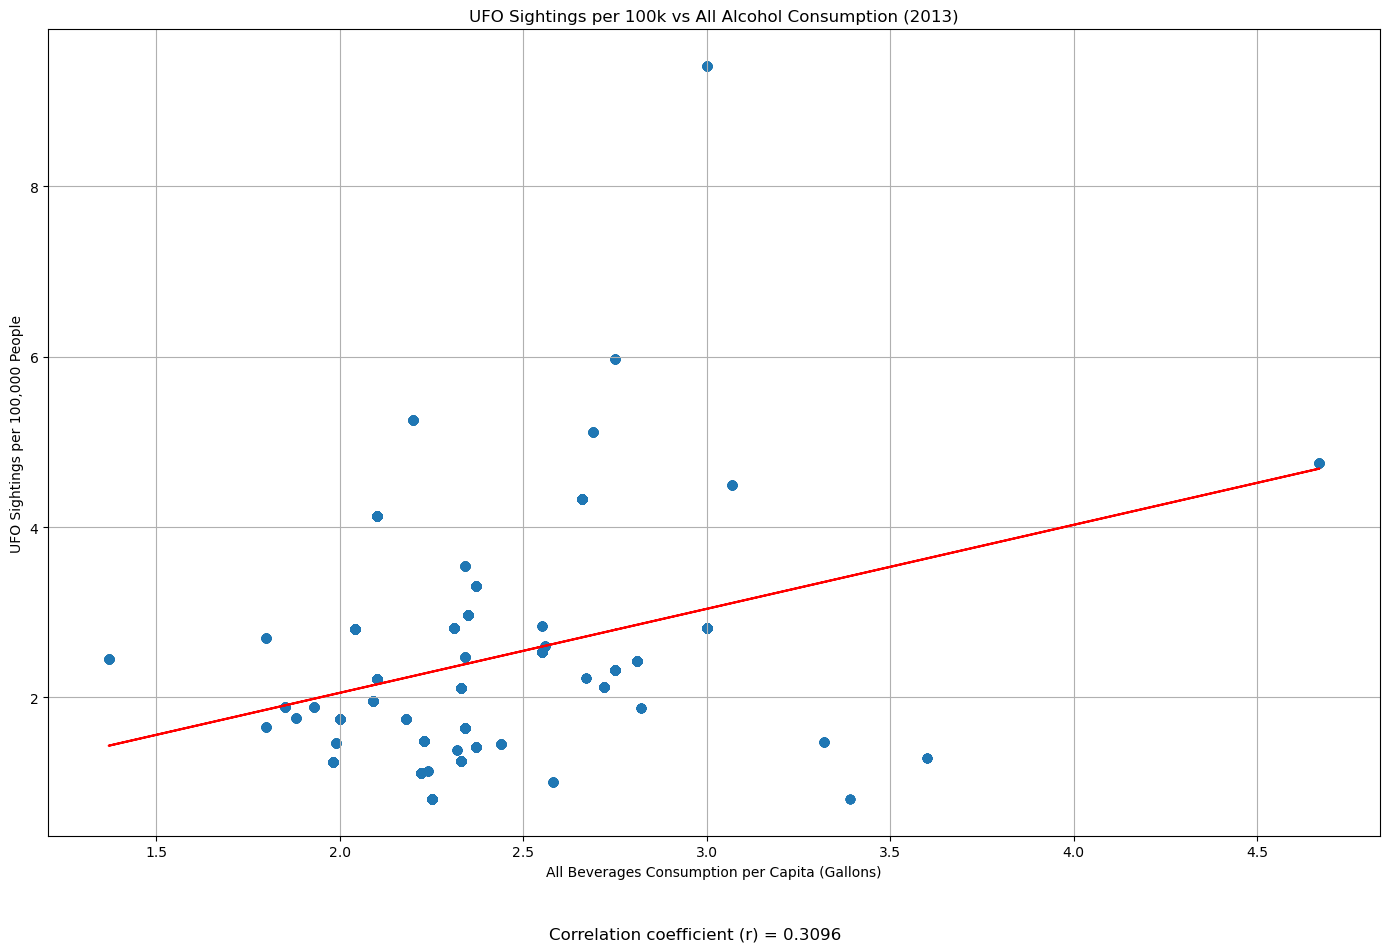

Correlation coefficient (r): 0.3096
P-value: 0.00000000



# ✨ Hypothesis 2: UFO Sightings vs Alcohol Consumption

---

###  Null Hypothesis (H₀):
> ❌ There is **no relationship** between alcohol consumption per capita and the number of UFO sightings per state.

###  Alternative Hypothesis (H₁):
> ✅ There **is a relationship** between alcohol consumption per capita and the number of UFO sightings per state.

---

## 📈 Results:
- 📊 The **correlation coefficient (r)** between UFO sightings per 100k and all beverages consumption is **0.3096**.
- ➡️ This indicates a **weak positive correlation** between the two variables.
- 📉 The **p-value** is **0.0000**, which is less than the significance level of 0.05.
- ✅ Therefore, we can **reject the null hypothesis**.

---

## 📚 Interpretation:
- The **p-value** supports the conclusion that there is a statistically significant relationship between alcohol consumption and UFO sightings. However, the **weak correlation** indicates that while there is a relationship, it may not be strong enough to draw definitive conclusions about causation or predictive power.
---
## What's next?
- I will analyze the relationship between **UFO sightings** and **alcohol consumption** for each type of alcohol **(beer, wine, spirits)** separately.
- I will also plot a **correlation heatmap** to visualize the relationships between all three types of alcohol consumption and UFO sightings per 100k.
- I will plot UFO sightings per 100,000 people by state to visualize each state's relative contribution across the United States.


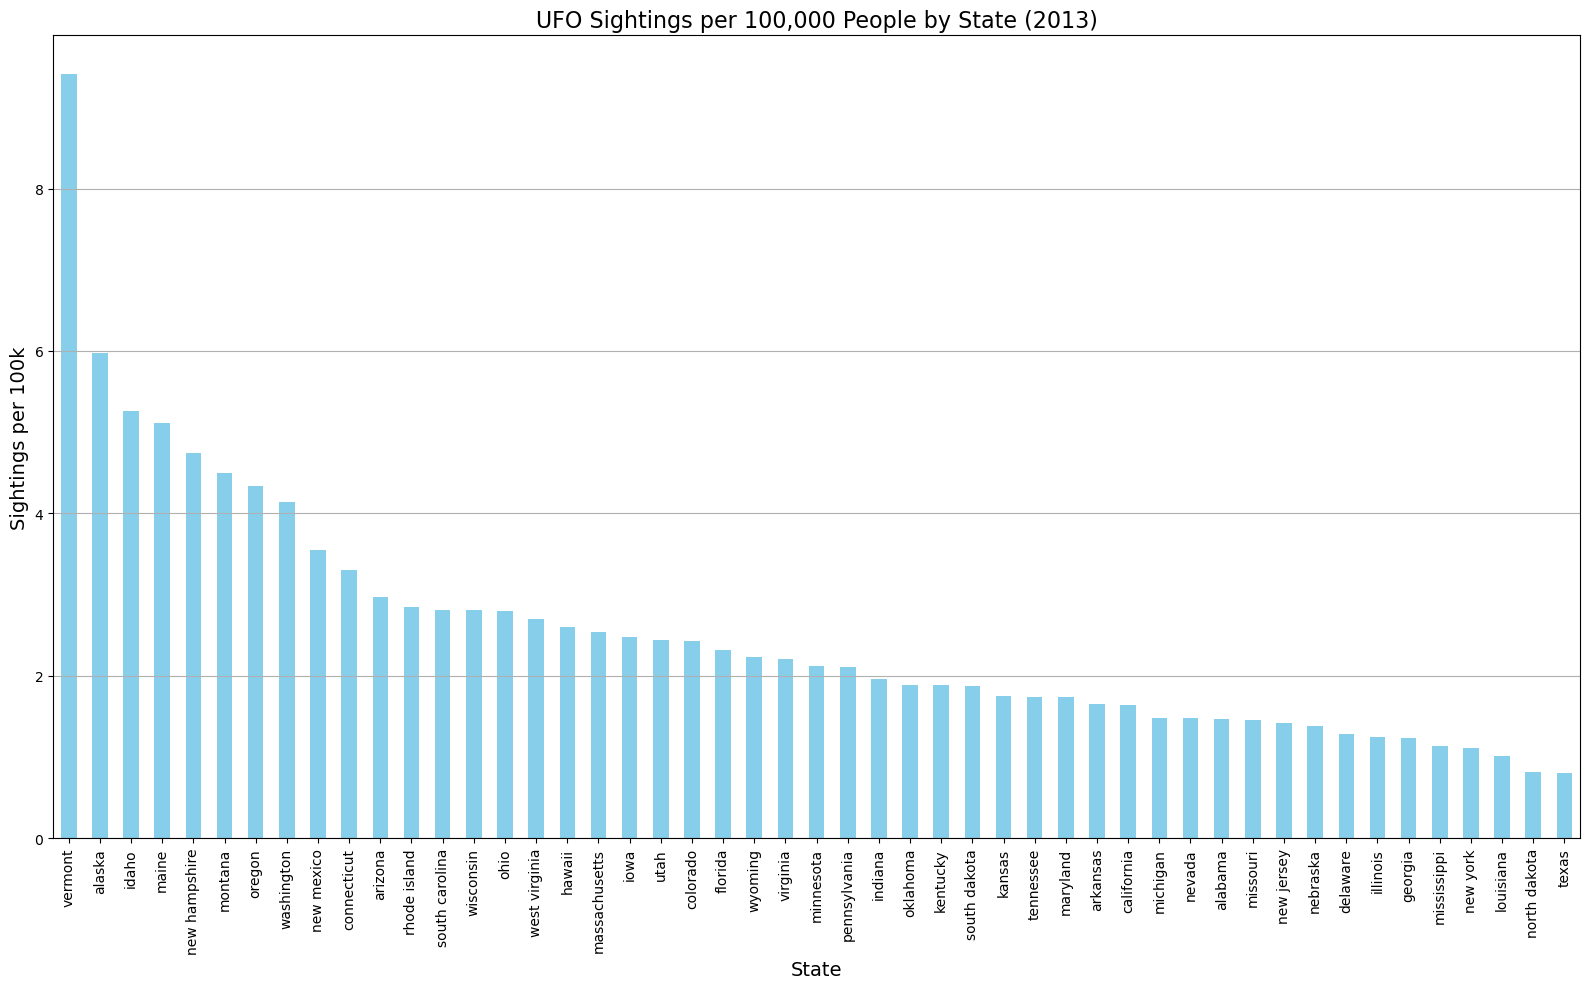


---


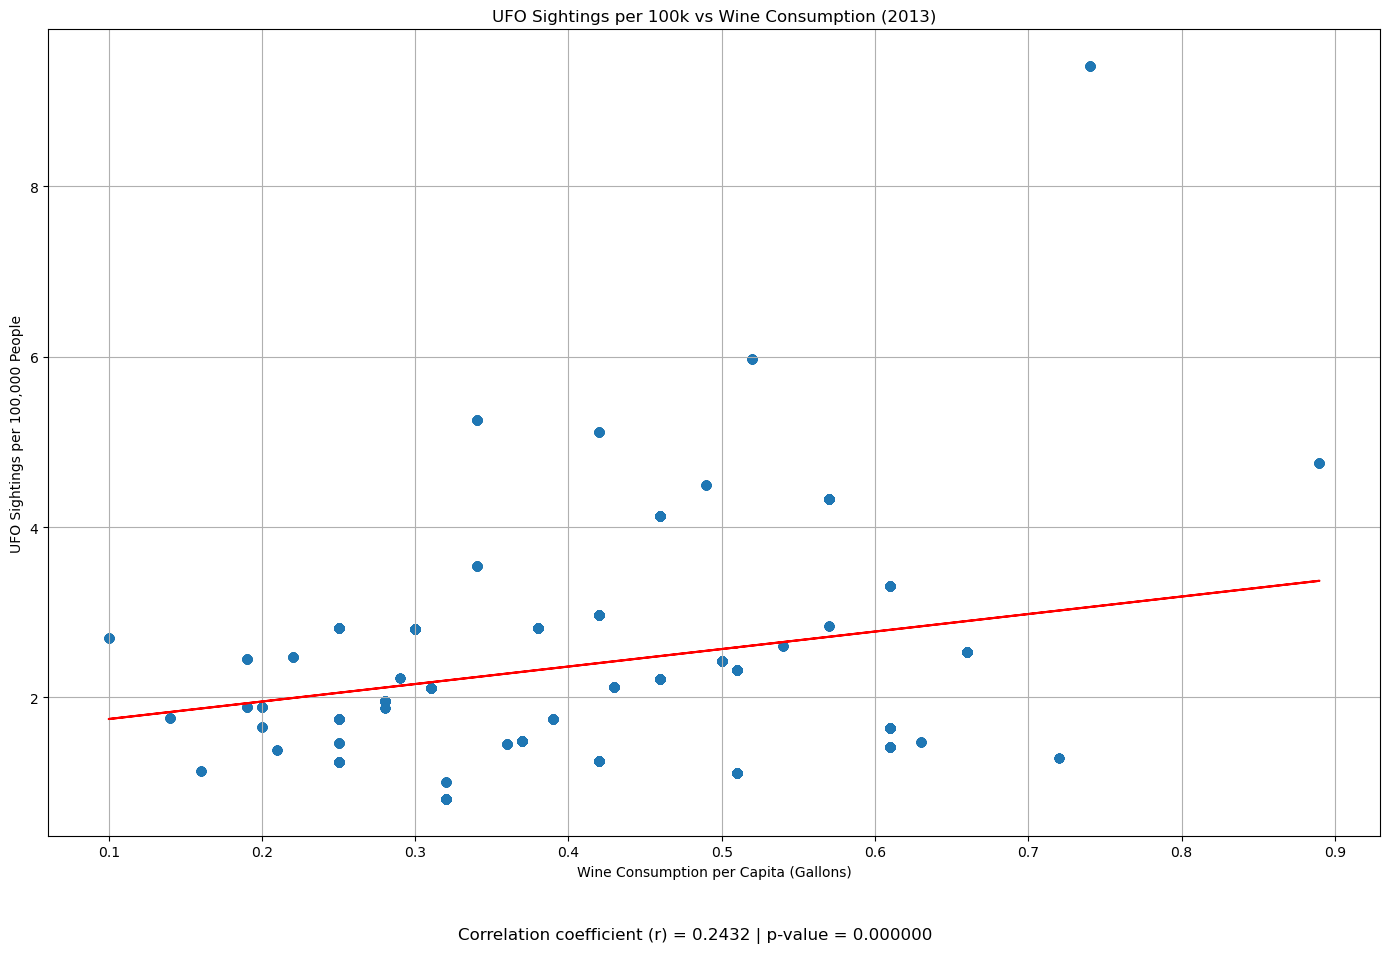

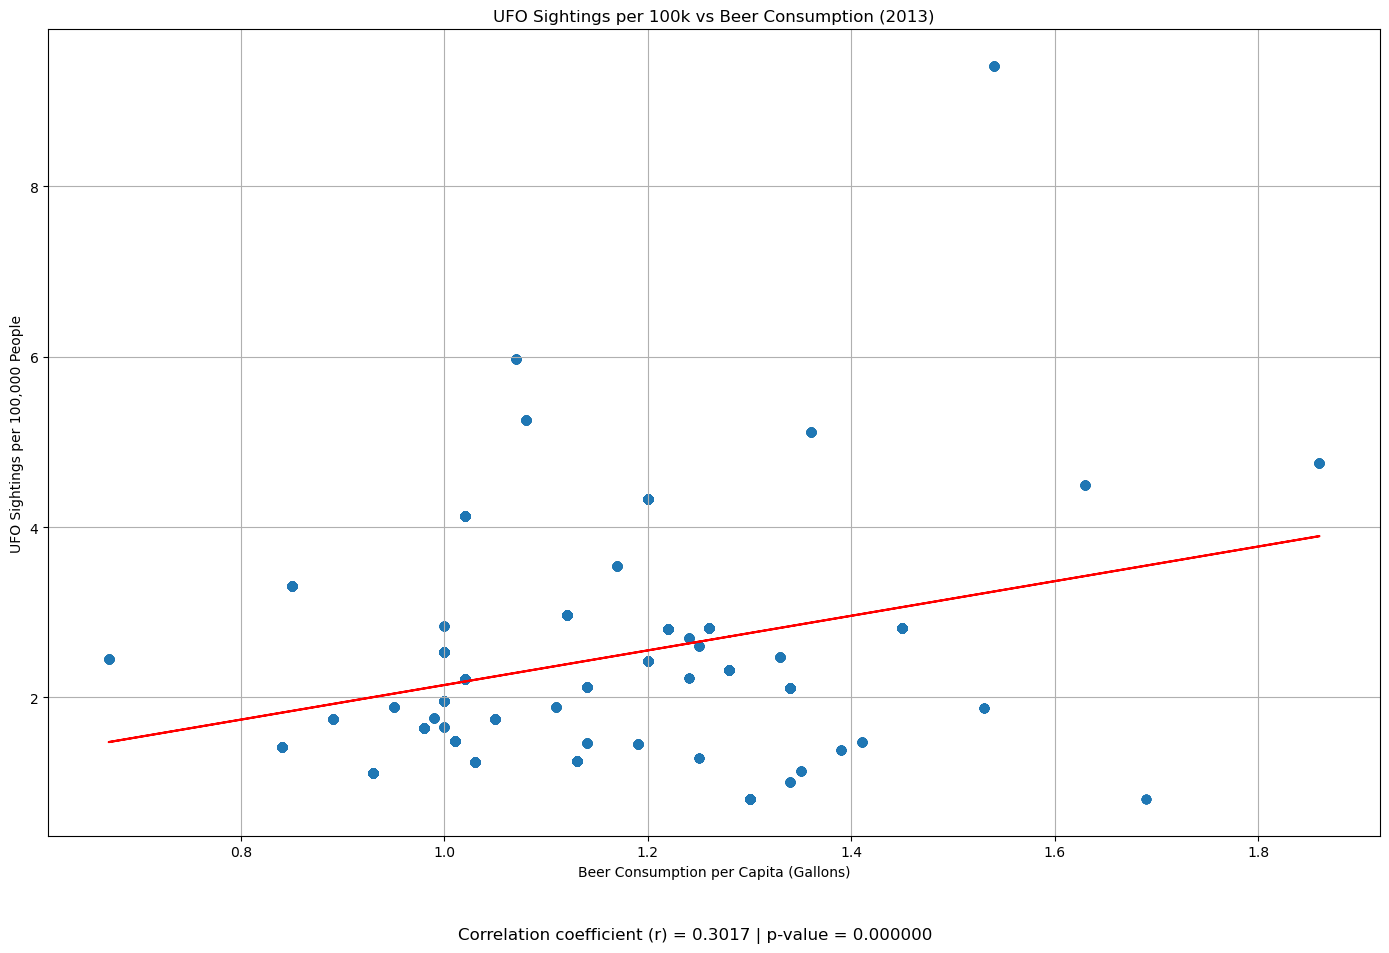

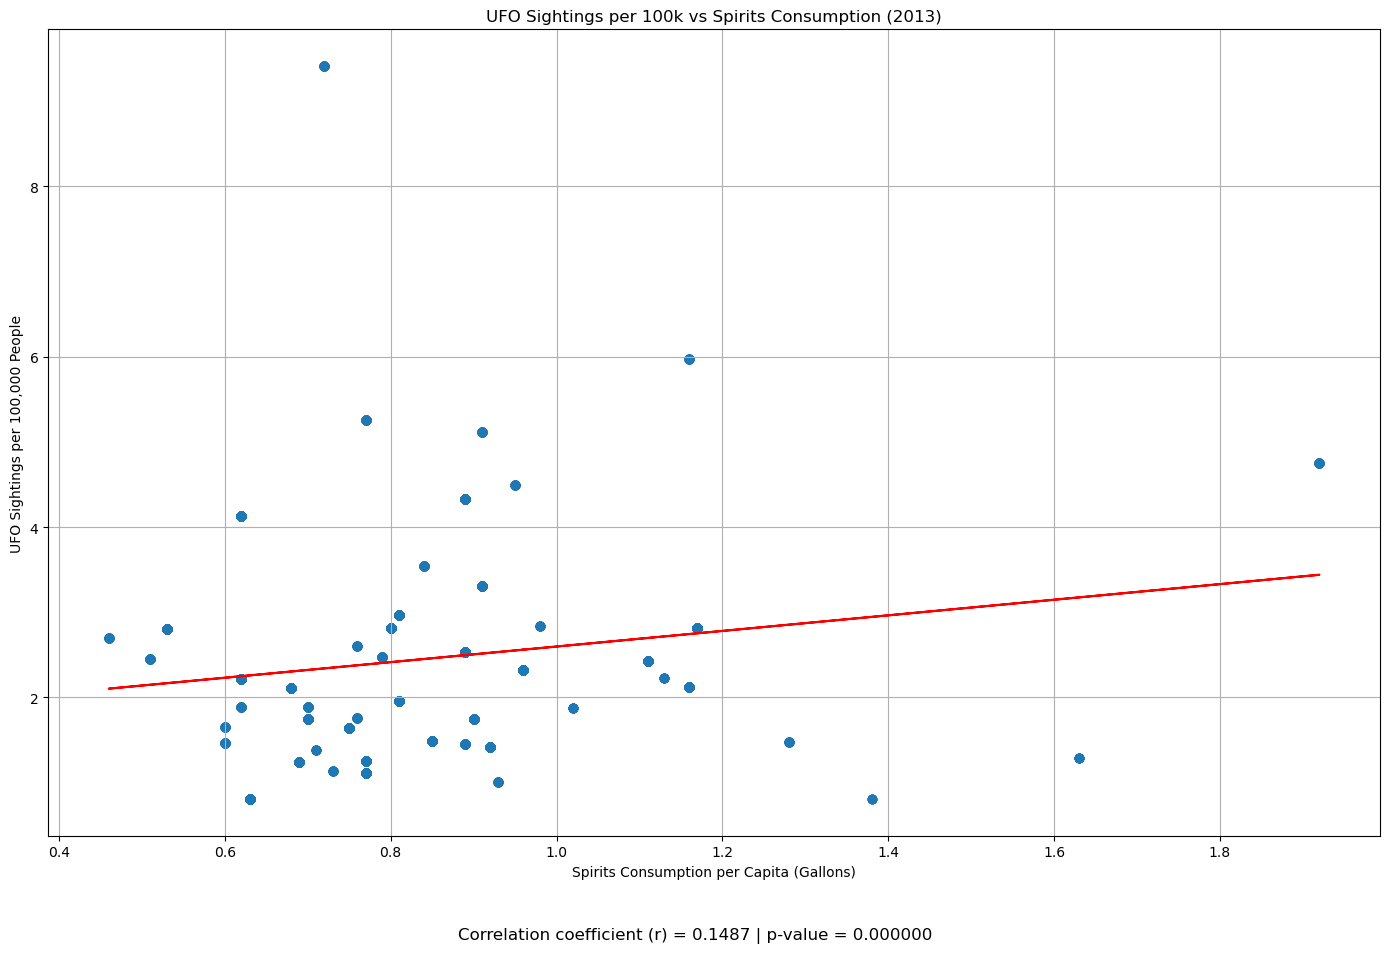

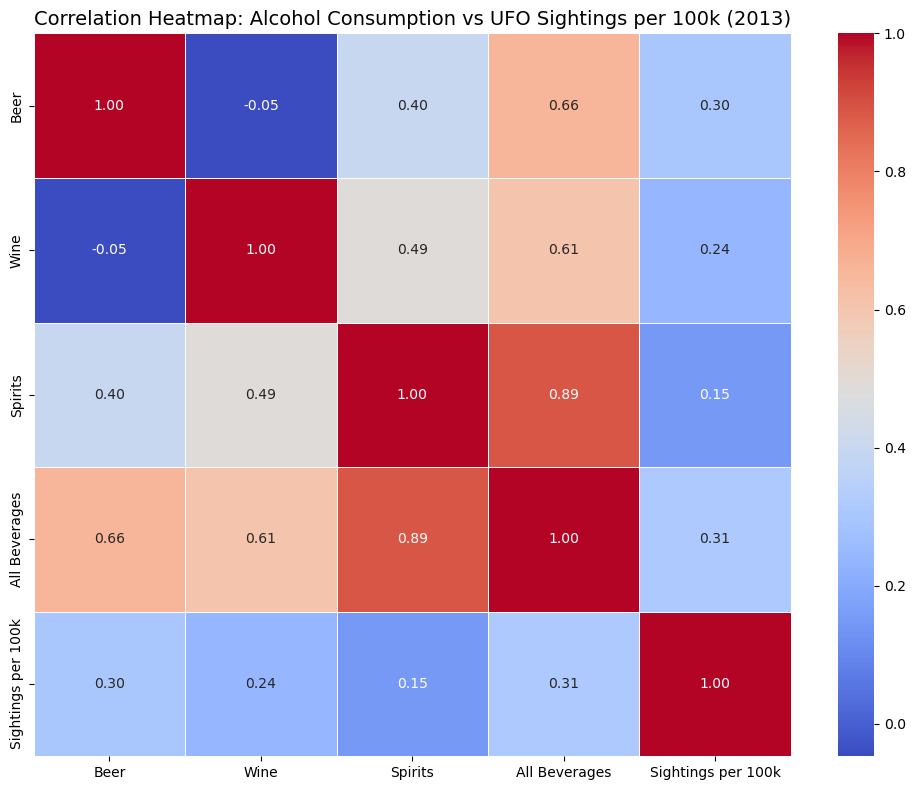


## 📊 Summary of the Charts:

- Although the p-values obtained from the statistical tests are low enough to **reject the null hypothesis** (indicating that there is a statistically significant relationship), 
- The actual **correlation coefficients (r-values)** are relatively low, 
- This suggests that while the relationships between alcohol consumption types and UFO sightings are statistically significant, they are **weak in strength** and **may not have strong practical meaning**.
- In other words, the data shows **some association**, but **the correlations are not strong enough** to imply a robust or highly predictive relationship.
- Therefore, any observed trends should be interpreted with **caution**, and **further investigation** with additional variables may be needed to better understand the underlying factors.


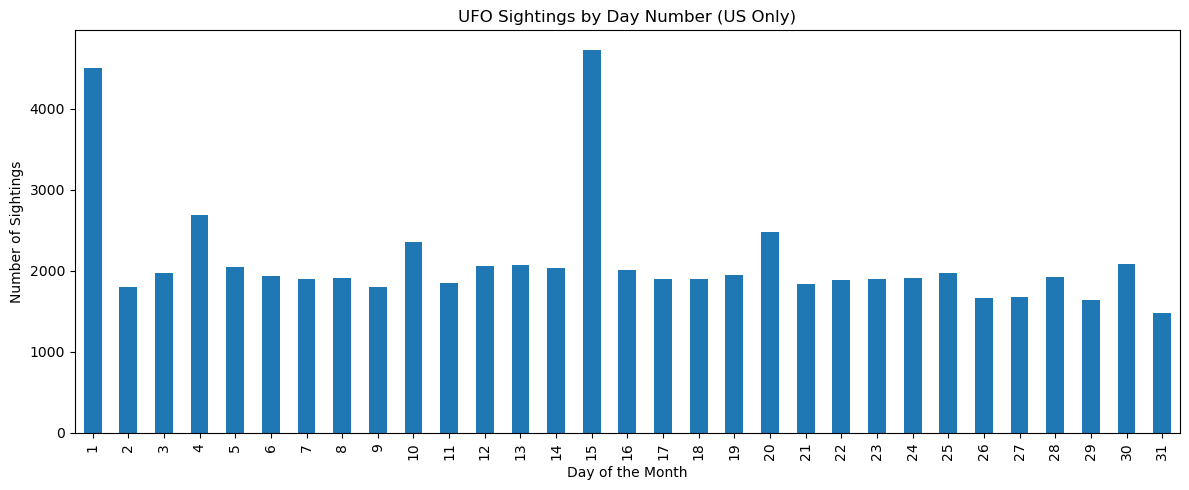


### **Intresting chart:**
- I find this plot interesting because it shows that the **number of UFO sightings** is not evenly distributed throughout the month which suggests that there may be some **solid patterns** in the data.
- I tend to think that the **number of sightings** is higher on certain days of the month, which could be related to **seasonal factors** or **events** that attract more attention to the sky, such as **moon phases**, **weather conditions**.
- However, I was unable to analyze the impact of weather conditions due to the time-consuming process of cleaning and merging the weather data with the UFO sightings by specific dates.
- I will leave this for future work, but I think it would be interesting to see if there are any correlations between **weather conditions** and **UFO sightings**.

### 📌 **Conclusion:**

This analysis explored the relationship between alcohol consumption and UFO sightings across U.S. states in 2013.  
While statistically significant correlations were found between overall alcohol consumption and UFO sightings, the strength of these relationships was weak.  
Visual trends suggested some associations, but they were not strong enough to draw definitive conclusions.  
Hypothesis about wheather conditions and UFO sightings couldn't analysed due to time constraints.
- Future work could include a more comprehensive analysis of other factors, such as **weather conditions**, to better understand the dynamics of UFO sightings.

### **Acknowledgment:**
Assistance with specific technical components like Markdown formatting, and hypothesis layout was provided using ChatGPT by OpenAI (2024), based on user-generated data and user-guided context.

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr
from IPython.display import Markdown, display

## Load Data 
file_path = "complete.csv"
data = pd.read_csv("complete.csv", on_bad_lines="skip", low_memory=False) # there are some bad lines in the csv file so I skip them

##  Data Cleaning-up/Manipulation
data = data.dropna()  # drop rows with missing values
data = data.drop_duplicates()  # drop duplicate rows 
data = data.reset_index(drop=True)  # reset index after dropping rows
data_us = data[data['country'].str.lower() == 'us'] # drop rows not from the US
data_us = data_us.dropna(subset=['state']) # drop rows with missing state info just in case
# I dropped the rows with missing values and duplicates, because I want to keep the data clean and accurate for analysis.
# Also, I dropped the rows not from the US and the rows with missing state info, because I want to focus on the US data and make sure I have complete information for each state.


# print(len(data_us))   # Number of rows BEFORE (check)

# date transformation
data_us['datetime'] = pd.to_datetime(data_us['datetime'], errors='coerce')
data_us['month'] = data_us['datetime'].dt.month.astype('Int64')
data_us['day'] = data_us['datetime'].dt.day.astype('Int64')
data_us['year'] = data_us['datetime'].dt.year.astype('Int64')

# print(len(data_us))   # Number of rows AFTER  (check)
display(Markdown("""
### To start with, I will analyze the UFO sightings data in the US.
"""))
year_counts = data_us['year'].value_counts().sort_index()
year_counts.plot(kind='bar', figsize=(12, 5))
plt.xlabel('Year')
plt.ylabel('Number of Sightings')
plt.title('UFO Sightings per Year (US Only)')
plt.tight_layout()
plt.show()

display(Markdown("""
### 1.Visual Support:
- Bar plot shows 2012 and 2013 has the highest amounts of sighting in data.
- The year 2013 is the second **highest number of sightings**.
- Therefore, I will focus on the year 2013 for further analysis. But before that here's sightings state by state to see if there are any highlighted states.:
"""))
# dictionary to map 2-letter codes to full lowercase state names
state_abbrev_to_full = {
    'al': 'alabama', 'ak': 'alaska', 'az': 'arizona', 'ar': 'arkansas',
    'ca': 'california', 'co': 'colorado', 'ct': 'connecticut', 'de': 'delaware',
    'fl': 'florida', 'ga': 'georgia', 'hi': 'hawaii', 'id': 'idaho',
    'il': 'illinois', 'in': 'indiana', 'ia': 'iowa', 'ks': 'kansas',
    'ky': 'kentucky', 'la': 'louisiana', 'me': 'maine', 'md': 'maryland',
    'ma': 'massachusetts', 'mi': 'michigan', 'mn': 'minnesota', 'ms': 'mississippi',
    'mo': 'missouri', 'mt': 'montana', 'ne': 'nebraska', 'nv': 'nevada',
    'nh': 'new hampshire', 'nj': 'new jersey', 'nm': 'new mexico', 'ny': 'new york',
    'nc': 'north carolina', 'nd': 'north dakota', 'oh': 'ohio', 'ok': 'oklahoma',
    'or': 'oregon', 'pa': 'pennsylvania', 'ri': 'rhode island', 'sc': 'south carolina',
    'sd': 'south dakota', 'tn': 'tennessee', 'tx': 'texas', 'ut': 'utah',
    'vt': 'vermont', 'va': 'virginia', 'wa': 'washington', 'wv': 'west virginia',
    'wi': 'wisconsin', 'wy': 'wyoming', 'dc': 'district of columbia',
    'pr': 'puerto rico'  # puerto rico is not a state but is included in the UFO dataset
}

# map state codes to full names and Visualize
data_us['state'] = data_us['state'].str.lower()  # ensure lowercase for mapping
data_us['state_full'] = data_us['state'].map(state_abbrev_to_full)
state_counts_full = data_us['state_full'].value_counts().sort_values(ascending=False)
state_counts_full.plot(kind='bar', figsize=(16, 6))
plt.xlabel('State (Full Name)')
plt.ylabel('Number of Sightings')
plt.title('UFO Sightings by U.S. State (Full Names)')
plt.tight_layout()
plt.show()

display(Markdown("""
### 2.Visual Support:
- Bar plot shows **sightings by state**.
- **California** has the **highest number of sightings**. 
### What's next?
- I will analyze the relationship between **UFO sightings** and **alcohol consumption** in the US.
- I will use the **2013 alcohol consumption data** to see if there my to test my second hypothesis that **alcohol consumption** is related to **UFO sightings**.
"""))
## Data Cleaning-up/Manipulation/loading (continued)
death_d = pd.read_csv("us_death_data.csv", on_bad_lines="skip") # there are some bad lines in the csv file so I skip them
alcohol_d = pd.read_csv("alcohol_consumption_2013.csv", on_bad_lines="skip")
pop_d = pd.read_csv("us_state_population_2013(july).csv", on_bad_lines="skip")
alcohol_d['State'] = alcohol_d['State'].str.lower()
death_d["State"] = death_d["State"].str.lower()

# filtering data_us for only year 2013 because the alcohol consumption data is only from 2013
data_us_2013 = data_us[data_us['year'] == 2013].copy() 
#  clean both sides (lowercase + strip spaces)
data_us_2013['state_full'] = data_us_2013['state_full'].str.lower().str.strip()
alcohol_d['State'] = alcohol_d['State'].str.lower().str.strip()
# merging
merged_df = pd.merge(data_us_2013, alcohol_d, left_on='state_full', right_on='State', how='inner')
# droping duplicate 'State' column
merged_df = merged_df.drop(columns=['State'])
# check
print(merged_df.shape)
merged_df.head()


#  making sure state names are clean
merged_df['state_full'] = merged_df['state_full'].str.lower().str.strip()
pop_d['State'] = pop_d['State'].str.lower().str.strip()
#  count UFO sightings per state (only for 2013 sightings)
sightings_per_state_2013 = merged_df['state_full'].value_counts().reset_index()
sightings_per_state_2013.columns = ['state_full', 'UFO Sightings']
#  merge with population data
merged_pop_2013 = pd.merge(sightings_per_state_2013, pop_d, left_on='state_full', right_on='State', how='left')
#  calculate Sightings per 100,000 people
merged_pop_2013['Sightings per 100k'] = (merged_pop_2013['UFO Sightings'] / merged_pop_2013['Population']) * 100000
#  clean merged_df first (drop any old 'Sightings per 100k' if exist)
merged_df = merged_df.drop(columns=[col for col in merged_df.columns if 'Sightings per 100k' in col], errors='ignore')
merged_df = pd.merge(merged_df, merged_pop_2013[['state_full', 'Sightings per 100k']], on='state_full', how='left')
# final check
merged_df.head()



## Data Visualization
# 1. UFO Sightings per 100k vs All Beverages Consumption
plt.figure(figsize=(14, 9))
plt.scatter(merged_df['All Beverages'], merged_df['Sightings per 100k'])
plt.title('UFO Sightings per 100k vs All Alcohol Consumption (2013)')
plt.xlabel('All Beverages Consumption per Capita (Gallons)')
plt.ylabel('UFO Sightings per 100,000 People')
m, b = np.polyfit(merged_df['All Beverages'], merged_df['Sightings per 100k'], 1)
plt.plot(merged_df['All Beverages'], m * merged_df['All Beverages'] + b, color='red')
r_value, p_value = pearsonr(merged_df['All Beverages'], merged_df['Sightings per 100k'])
plt.figtext(0.5, -0.05, f"Correlation coefficient (r) = {r_value:.4f}", ha='center', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()
r_value, p_value = pearsonr(merged_df['All Beverages'], merged_df['Sightings per 100k'])
print(f"Correlation coefficient (r): {r_value:.4f}")
print(f"P-value: {p_value:.8f}")

display(Markdown("""
# ✨ Hypothesis 2: UFO Sightings vs Alcohol Consumption

---

###  Null Hypothesis (H₀):
> ❌ There is **no relationship** between alcohol consumption per capita and the number of UFO sightings per state.

###  Alternative Hypothesis (H₁):
> ✅ There **is a relationship** between alcohol consumption per capita and the number of UFO sightings per state.

---

## 📈 Results:
- 📊 The **correlation coefficient (r)** between UFO sightings per 100k and all beverages consumption is **0.3096**.
- ➡️ This indicates a **weak positive correlation** between the two variables.
- 📉 The **p-value** is **0.0000**, which is less than the significance level of 0.05.
- ✅ Therefore, we can **reject the null hypothesis**.

---

## 📚 Interpretation:
- The **p-value** supports the conclusion that there is a statistically significant relationship between alcohol consumption and UFO sightings. However, the **weak correlation** indicates that while there is a relationship, it may not be strong enough to draw definitive conclusions about causation or predictive power.
---
## What's next?
- I will analyze the relationship between **UFO sightings** and **alcohol consumption** for each type of alcohol **(beer, wine, spirits)** separately.
- I will also plot a **correlation heatmap** to visualize the relationships between all three types of alcohol consumption and UFO sightings per 100k.
- I will plot UFO sightings per 100,000 people by state to visualize each state's relative contribution across the United States.
"""))




state_sightings = merged_df.groupby('state_full')['Sightings per 100k'].mean().sort_values(ascending=False)
plt.figure(figsize=(16, 10))
state_sightings.plot(kind='bar', color='skyblue')
plt.title('UFO Sightings per 100,000 People by State (2013)', fontsize=16)
plt.xlabel('State', fontsize=14)
plt.ylabel('Sightings per 100k', fontsize=14)
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()
display(Markdown("""
---
"""))
# 2. UFO Sightings per 100k vs Wine Consumption
plt.figure(figsize=(14, 9))
plt.scatter(merged_df['Wine'], merged_df['Sightings per 100k'])
plt.title('UFO Sightings per 100k vs Wine Consumption (2013)')
plt.xlabel('Wine Consumption per Capita (Gallons)')
plt.ylabel('UFO Sightings per 100,000 People')
m, b = np.polyfit(merged_df['Wine'], merged_df['Sightings per 100k'], 1)
plt.plot(merged_df['Wine'], m * merged_df['Wine'] + b, color='red')
r_value, p_value = pearsonr(merged_df['Wine'], merged_df['Sightings per 100k'])
plt.figtext(0.5, -0.05, f"Correlation coefficient (r) = {r_value:.4f} | p-value = {p_value:.6f}", 
            ha='center', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()



# 3. UFO Sightings per 100k vs Beer Consumption
plt.figure(figsize=(14, 9))
plt.scatter(merged_df['Beer'], merged_df['Sightings per 100k'])
plt.title('UFO Sightings per 100k vs Beer Consumption (2013)')
plt.xlabel('Beer Consumption per Capita (Gallons)')
plt.ylabel('UFO Sightings per 100,000 People')
m, b = np.polyfit(merged_df['Beer'], merged_df['Sightings per 100k'], 1)
plt.plot(merged_df['Beer'], m * merged_df['Beer'] + b, color='red')
r_value, p_value = pearsonr(merged_df['Beer'], merged_df['Sightings per 100k'])
plt.figtext(0.5, -0.05, f"Correlation coefficient (r) = {r_value:.4f} | p-value = {p_value:.6f}", 
            ha='center', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()




# 4. UFO Sightings per 100k vs Spirits Consumption
plt.figure(figsize=(14, 9))
plt.scatter(merged_df['Spirits'], merged_df['Sightings per 100k'])
plt.title('UFO Sightings per 100k vs Spirits Consumption (2013)')
plt.xlabel('Spirits Consumption per Capita (Gallons)')
plt.ylabel('UFO Sightings per 100,000 People')
m, b = np.polyfit(merged_df['Spirits'], merged_df['Sightings per 100k'], 1)
plt.plot(merged_df['Spirits'], m * merged_df['Spirits'] + b, color='red')
r_value, p_value = pearsonr(merged_df['Spirits'], merged_df['Sightings per 100k'])
plt.figtext(0.5, -0.05, f"Correlation coefficient (r) = {r_value:.4f} | p-value = {p_value:.6f}", 
            ha='center', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

# 5. Correlation Heatmap
heatmap_data = merged_df[['Beer', 'Wine', 'Spirits', 'All Beverages', 'Sightings per 100k']]
corr_matrix = heatmap_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap: Alcohol Consumption vs UFO Sightings per 100k (2013)', fontsize=14)
plt.tight_layout()
plt.show()

display(Markdown("""
## 📊 Summary of the Charts:

- Although the p-values obtained from the statistical tests are low enough to **reject the null hypothesis** (indicating that there is a statistically significant relationship), 
- The actual **correlation coefficients (r-values)** are relatively low, 
- This suggests that while the relationships between alcohol consumption types and UFO sightings are statistically significant, they are **weak in strength** and **may not have strong practical meaning**.
- In other words, the data shows **some association**, but **the correlations are not strong enough** to imply a robust or highly predictive relationship.
- Therefore, any observed trends should be interpreted with **caution**, and **further investigation** with additional variables may be needed to better understand the underlying factors.
"""))

# 6. UFO Sightings by day number (additional analysis)
day_number_counts = data_us['day'].value_counts().sort_index() # count the number of sightings for each day of the month	
day_number_counts.plot(kind='bar', figsize=(12, 5))
plt.xlabel('Day of the Month')
plt.ylabel('Number of Sightings')
plt.title('UFO Sightings by Day Number (US Only)')
plt.xticks(range(0, 31), [str(i+1) for i in range(31)]) 
plt.tight_layout()
plt.show()

display(Markdown("""
### **Intresting chart:**
- I find this plot interesting because it shows that the **number of UFO sightings** is not evenly distributed throughout the month which suggests that there may be some **solid patterns** in the data.
- I tend to think that the **number of sightings** is higher on certain days of the month, which could be related to **seasonal factors** or **events** that attract more attention to the sky, such as **moon phases**, **weather conditions**.
- However, I was unable to analyze the impact of weather conditions due to the time-consuming process of cleaning and merging the weather data with the UFO sightings by specific dates.
- I will leave this for future work, but I think it would be interesting to see if there are any correlations between **weather conditions** and **UFO sightings**.

### 📌 **Conclusion:**

This analysis explored the relationship between alcohol consumption and UFO sightings across U.S. states in 2013.  
While statistically significant correlations were found between overall alcohol consumption and UFO sightings, the strength of these relationships was weak.  
Visual trends suggested some associations, but they were not strong enough to draw definitive conclusions.  
Hypothesis about wheather conditions and UFO sightings couldn't analysed due to time constraints.
- Future work could include a more comprehensive analysis of other factors, such as **weather conditions**, to better understand the dynamics of UFO sightings.

### **Acknowledgment:**
Assistance with specific technical components like Markdown formatting, and hypothesis layout was provided using ChatGPT by OpenAI (2024), based on user-generated data and user-guided context."""))

     
